<a href="https://colab.research.google.com/github/alexmjn/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/module4-make-explanatory-visualizations/LS_DS_114_Make_Explanatory_Visualizations_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 1, Sprint 1, Module 4*

---

# ASSIGNMENT

### 1) Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).

Get caught up to where we got our example in class and then try and take things further. How close to "pixel perfect" can you make the lecture graph?

Once you have something that you're proud of, share your graph in the cohort channel and move on to the second exercise.

### 2) Reproduce another example from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

**WARNING**: There are a lot of very custom graphs and tables at the above link. I **highly** recommend not trying to reproduce any that look like a table of values or something really different from the graph types that we are already familiar with. Search through the posts until you find a graph type that you are more or less familiar with: histogram, bar chart, stacked bar chart, line chart, [seaborn relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html), etc. Recreating some of the graphics that 538 uses would be a lot easier in Adobe photoshop/illustrator than with matplotlib. 

- If you put in some time to find a graph that looks "easy" to replicate you'll probably find that it's not as easy as you thought. 

- If you start with a graph that looks hard to replicate you'll probably run up against a brick wall and be disappointed with your afternoon.












In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/inconvenient-sequel/ratings.csv')

In [4]:
df.head()

,timestamp,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
0,2017-07-17 12:28:32.785639,402,Males,http://www.imdb.com/title/tt6322922/ratings-male,4.6,5.0,2,197,7,7,3,7,7,11,8,20,135,49.0,1.7,1.7,0.7,1.7,1.7,2.7,2.0,5.0,33.6
1,2017-07-17 12:28:33.025600,78,Females,http://www.imdb.com/title/tt6322922/ratings-fe...,6.9,7.7,10,16,1,0,1,1,0,3,4,3,49,20.5,1.3,0.0,1.3,1.3,0.0,3.8,5.1,3.8,62.8
2,2017-07-17 12:28:33.273919,4,Aged under 18,http://www.imdb.com/title/tt6322922/ratings-age_1,4.2,4.2,3,2,0,0,0,1,0,0,0,0,1,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
3,2017-07-17 12:28:33.495325,4,Males under 18,http://www.imdb.com/title/tt6322922/ratings-ma...,4.2,4.2,3,2,0,0,0,1,0,0,0,0,1,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
4,2017-07-17 12:28:33.722849,130,Aged 18-29,http://www.imdb.com/title/tt6322922/ratings-age_2,6.3,6.5,9,41,0,3,1,2,3,6,4,6,64,31.5,0.0,2.3,0.8,1.5,2.3,4.6,3.1,4.6,49.2


In [5]:
df.tail()

,timestamp,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
80048,2017-08-29 23:10:05.369510,8,IMDb staff,http://www.imdb.com/title/tt6322922/ratings-im...,8.4,7.2,8,1,0,0,0,0,1,1,2,2,1,12.5,0.0,0.0,0.0,0.0,12.5,12.5,25.0,25.0,12.5
80049,2017-08-29 23:10:05.598331,41,Top 1000 voters,http://www.imdb.com/title/tt6322922/ratings-to...,4.6,4.7,5,11,4,2,2,5,4,5,1,1,6,26.8,9.8,4.9,4.9,12.2,9.8,12.2,2.4,2.4,14.6
80050,2017-08-29 23:10:05.794141,925,US users,http://www.imdb.com/title/tt6322922/ratings-usa,4.8,5.0,4,405,34,20,8,9,30,54,46,60,259,43.8,3.7,2.2,0.9,1.0,3.2,5.8,5.0,6.5,28.0
80051,2017-08-29 23:10:06.022268,565,Non-US users,http://www.imdb.com/title/tt6322922/ratings-in...,6.4,6.5,7,129,11,10,8,32,47,52,37,35,204,22.8,1.9,1.8,1.4,5.7,8.3,9.2,6.5,6.2,36.1
80052,2017-08-29 23:10:06.218251,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7


In [7]:
df.iloc[80052]

timestamp                       2017-08-29 23:10:06.218251
respondents                                           2662
category                                        IMDb users
link           http://www.imdb.com/title/tt6322922/ratings
average                                                5.4
mean                                                   5.6
median                                                   7
1_votes                                               1021
2_votes                                                 69
3_votes                                                 38
4_votes                                                 25
5_votes                                                 55
6_votes                                                110
7_votes                                                154
8_votes                                                147
9_votes                                                146
10_votes                                               8

In [0]:
percents = pd.Series([38.4, 2.6, 1.4, 0.9, 2.1, 4.1, 5.8, 5.5, 5.5, 33.7])


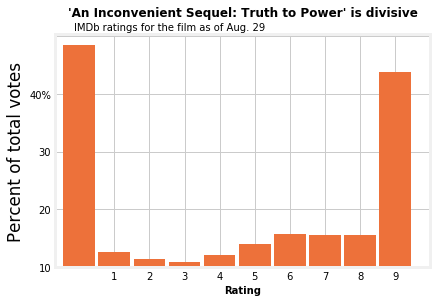

In [50]:
fig, ax = plt.subplots()
plt.style.use('fivethirtyeight')
percents.plot.bar(width = .9, color = '#ED713A')
fig.patch.set(facecolor = "white")
ax.set(facecolor = "white")
ax.set_xlabel("Rating", fontweight = "bold", fontsize = 10)
ax.set_ylabel("Percent of total votes")
ax.set_title("'An Inconvenient Sequel: Truth to Power' is divisive", fontweight = "bold", fontsize = 12,y = 1.05)
ax.text(s = "IMDb ratings for the film as of Aug. 29", x = -.15, y = 41, fontsize = 10)
ax.set_yticklabels([10, 20, 30, "40%"], fontsize = 10)
ax.set_xticklabels(range(1, 10), rotation = "horizontal", fontsize = 10)
ax.set_xticks(range(1, 11))

fig.show()

In [52]:
from google.colab import files
uploaded = files.upload()

Saving fight-songs.csv to fight-songs.csv


In [0]:
fight_data = pd.read_csv("fight-songs.csv")

In [54]:
fight_data.head()

,school,conference,song_name,writers,year,student_writer,official_song,contest,bpm,sec_duration,fight,number_fights,victory,win_won,victory_win_won,rah,nonsense,colors,men,opponents,spelling,trope_count,spotify_id
0,Notre Dame,Independent,Victory March,Michael J. Shea and John F. Shea,1908,No,Yes,No,152,64,Yes,1,Yes,Yes,Yes,Yes,No,Yes,Yes,No,No,6,15a3ShKX3XWKzq0lSS48yr
1,Baylor,Big 12,Old Fight,Dick Baker and Frank Boggs,1947,Yes,Yes,No,76,99,Yes,4,Yes,Yes,Yes,No,No,Yes,No,No,Yes,5,2ZsaI0Cu4nz8DHfBkPt0Dl
2,Iowa State,Big 12,Iowa State Fights,"Jack Barker, Manly Rice, Paul Gnam, Rosalind K...",1930,Yes,Yes,No,155,55,Yes,5,No,No,No,Yes,No,No,Yes,No,Yes,4,3yyfoOXZQCtR6pfRJqu9pl
3,Kansas,Big 12,I'm a Jayhawk,"George ""Dumpy"" Bowles",1912,Yes,Yes,No,137,62,No,0,No,No,No,No,Yes,No,Yes,Yes,No,3,0JzbjZgcjugS0dmPjF9R89
4,Kansas State,Big 12,Wildcat Victory,Harry E. Erickson,1927,Yes,Yes,No,80,67,Yes,6,Yes,No,Yes,No,No,Yes,No,No,No,3,4xxDK4g1OHhZ44sTFy8Ktm


In [0]:
bpm = fight_data["bpm"]
duration = fight_data["sec_duration"]

In [0]:
def mimic_538():
  fig, ax = plt.subplots()
  plt.style.use("fivethirtyeight")
  fig.patch.set(facecolor = "white")
  ax.set(facecolor = "white")
  
# Doesn't pass fig, ax out of the scope of the function. 

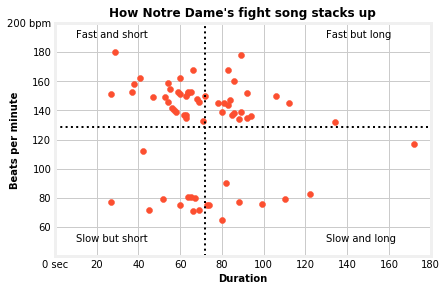

In [95]:
# Set style preferences, initialize plot
fig, ax = plt.subplots()
plt.style.use("fivethirtyeight")
fig.patch.set(facecolor = "white")
ax.set(facecolor = "white")  

# Plot data
ax.scatter(duration, bpm, marker = 'o', color = "C1")

# Set ticks and labels the way 538's graph has them
ax.set_xticks([0, 20, 40, 60, 80, 100, 120, 140, 160, 180])
ax.set_xticklabels(["0 sec", 20, 40, 60, 80, 100, 120, 140, 160, 180], fontsize = 10)
ax.set_yticks(range(40, 220, 20))
ax.set_yticklabels(["", 60, 80, 100, 120, 140, 160, 180, "200 bpm"], fontsize = 10)

# Add lines at the means for reference
ax.axvline(x = np.mean(duration), linestyle = "dotted", linewidth = 2, color = "black")
ax.axhline(y = np.mean(bpm), linestyle = "dotted", linewidth = 2, color = "black")

# Add titles
ax.set_xlabel("Duration", fontweight = "bold", size = 10)
ax.set_ylabel("Beats per minute", fontweight = "bold", size = 10, labelpad = -13)
ax.set_title("How Notre Dame's fight song stacks up", fontweight = "bold", size = 12)

# Add text
ax.text(10, 190, s = "Fast and short", size = 10)
ax.text(10, 50, s = "Slow but short", size = 10)
ax.text(130, 190, s = "Fast but long", size = 10)
ax.text(130, 50, s = "Slow and long", size = 10)

fig.show()

# STRETCH OPTIONS

### 1) Reproduce one of the following using the matplotlib or seaborn libraries:

- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) 
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) 
- or another example of your choice!

### 2) Make more charts!

Choose a chart you want to make, from [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary).

Find the chart in an example gallery of a Python data visualization library:
- [Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Altair](https://altair-viz.github.io/gallery/index.html)
- [Matplotlib](https://matplotlib.org/gallery.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) If you want, experiment and make changes.

Take notes. Consider sharing your work with your cohort!

In [0]:
# More Work Here